In [1]:
import numpy as np
from sklearn.linear_model import LinearRegression
import statistics
import matplotlib.pyplot as plt



# Dla jednej zmiennej

In [2]:
def sim_r_squared(n):
    x = np.random.normal(size=n)
    y = 1 + x + np.random.normal(size=n)
    
    x = x.reshape(-1,1)
    #Regresja liniowa:
    model = LinearRegression().fit(x,y)
    #Wspl R_sq:
    r_sq = model.score(x,y)
    return r_sq
    


In [3]:
sizes = list(range(10, 210, 10))
#Dla tysiąca powtórzeń bo jak daje 10000 to komputer się strasznie wiesza 
reps = 1000

squared_q95 = []
squared_q5 = []
squared_mean = []

for i in range(0,len(sizes)):
    print(sizes[i])
    result = []
    dodanie =[]
    for j in range(reps):
        dodanie = sim_r_squared(sizes[i])
        result.append(dodanie)
    #print(f"result {result}")
    x=statistics.mean(result)
    y=np.quantile(result,0.95)
    z=np.quantile(result,0.05)

    squared_mean.append(x)
    #print(f"squared mean{squared_mean}")
    
    squared_q95.append(y)
    #print(f"squared_q95 {squared_q95}")
    
    squared_q5.append(z)
    #print(f"quared_q5 {squared_q5}")
    

print(f"squared mean: {squared_mean}")
print(f"squared_q95:  {squared_q95}")
print(f"quared_q5: {squared_q5}")





10
20
30
40
50
60
70
80
90
100
110
120
130
140
150
160
170
180
190
200
squared mean: [0.5039307186373324, 0.5033637981113904, 0.502834801121162, 0.4993953086108655, 0.5061290238969821, 0.4962084680864861, 0.5033299349604134, 0.4997927198716684, 0.49592739807654374, 0.4986745865904365, 0.5005440771486006, 0.499173978594568, 0.4991937316695521, 0.5009125286611112, 0.49989264450377835, 0.5012340006387838, 0.5018256759620281, 0.4992111431167633, 0.5008816363516586, 0.5027619048163873]
squared_q95:  [0.8352603613648399, 0.7414520765512346, 0.6946315863052389, 0.6660615758067594, 0.6554262894594599, 0.6349692278783441, 0.6320566634625395, 0.627345762556399, 0.616890303178503, 0.6172797426094718, 0.6096741427408917, 0.60169411498543, 0.595061611546782, 0.5993102862002294, 0.5891033979269408, 0.5907520724977503, 0.5911106600836551, 0.581749642081975, 0.5828103949762845, 0.5855327109141436]
quared_q5: [0.10898474426367413, 0.20549159168655426, 0.281351044202165, 0.3095930113337641, 0.3302454911

(0.10898474426367413, 0.8352603613648399)

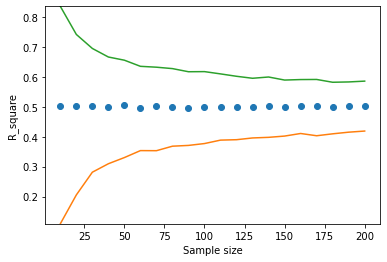

In [4]:

plt.plot(sizes,squared_mean,'o')
plt.plot(sizes,squared_q5)
plt.plot(sizes,squared_q95)
plt.xlabel("Sample size")
plt.ylabel("R_square")
plt.ylim(min(squared_q5),max(squared_q95))


# Dla wielu zmiennych 

In [5]:
def sim_sq_k(n,k):
    x = np.random.normal(0, 1, (n, k))
    z = np.full((n,1),1.0)
    b = np.append(x,z,axis=1)
    y = np.random.normal(size=n)
    #print(b)
    y = y.reshape(-1,1)
    #print(y)
    
    model_k = LinearRegression().fit(x,y)
    r_sq_k = model_k.score(x,y)

    return r_sq_k

In [6]:

sizes_k = list(range(10, 210, 10))
reps = 1000
k = 9 ##Liczba zmiennych

In [7]:
squared_q95_k = []
squared_q5_k = []
squared_mean_k = []

for i in range(0,len(sizes_k)):
    print(sizes_k[i])
    result_k = []
    dodanie_k =[]
    for j in range(reps):
        dodanie_k = sim_sq_k(sizes_k[i],k)
        result_k.append(dodanie_k)
    #print(f"result {result}")
    x=statistics.mean(result_k)
    y=np.quantile(result_k,0.95)
    z=np.quantile(result_k,0.05)

    squared_mean_k.append(x)
    #print(f"squared mean{squared_mean}")
    
    squared_q95_k.append(y)
    #print(f"squared_q95 {squared_q95}")
    
    squared_q5_k.append(z)
    #print(f"quared_q5 {squared_q5}")
    

print(f"squared mean: {squared_mean_k}")
print(f"squared_q95:  {squared_q95_k}")
print(f"quared_q5: {squared_q5_k}")



10
20
30
40
50
60
70
80
90
100
110
120
130
140
150
160
170
180
190
200
squared mean: [1.0, 0.4780513864942276, 0.3085390937680902, 0.23214702683852245, 0.18441921446264548, 0.15058739044037553, 0.1317743782622925, 0.10972669066163587, 0.10063686007688262, 0.08846640182148155, 0.0832866092634569, 0.07549425290425037, 0.06917572839418484, 0.06447711384021354, 0.060789355682510565, 0.056302831984865846, 0.0536876120773948, 0.049173174467221796, 0.04764647521291768, 0.04411077430230732]
squared_q95:  [1.0, 0.7420710844123825, 0.5224525532418044, 0.40165281167954076, 0.3217420010885475, 0.273088324100815, 0.23650066385153823, 0.19805741172908028, 0.18218419485051943, 0.167378282038178, 0.1491398217000992, 0.13742135063415611, 0.1270166002997984, 0.11834313437451706, 0.11242289060335647, 0.09963241768209787, 0.0985318993657504, 0.0910604380023843, 0.08584933809571707, 0.08344846293179246]
quared_q5: [1.0, 0.21488847078111337, 0.12344672369135938, 0.09459556461176434, 0.07536212707367401, 0.0

Text(0, 0.5, 'R_square')

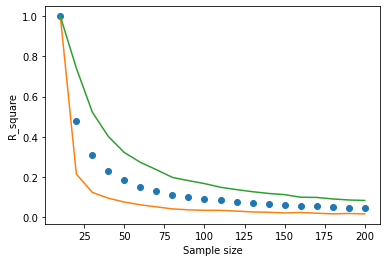

In [8]:
plt.plot(sizes_k,squared_mean_k,'o')
plt.plot(sizes_k,squared_q5_k)
plt.plot(sizes_k,squared_q95_k)
plt.xlabel("Sample size")
plt.ylabel("R_square")